In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [2]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [3]:
import os

In [4]:
os.getcwd()

'c:\\Users\\jjong\\Desktop\\Practice\\suanlab\\pytorch_practice'

In [5]:
trainset = datasets.MNIST(root='./',
                          train=True,
                          download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root='./',
                         train=False,
                         download=True,
                         transform=mnist_transform)

In [6]:
train_loader = DataLoader(trainset, batch_size = 8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size = 8, shuffle=False, num_workers=2)

In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [8]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

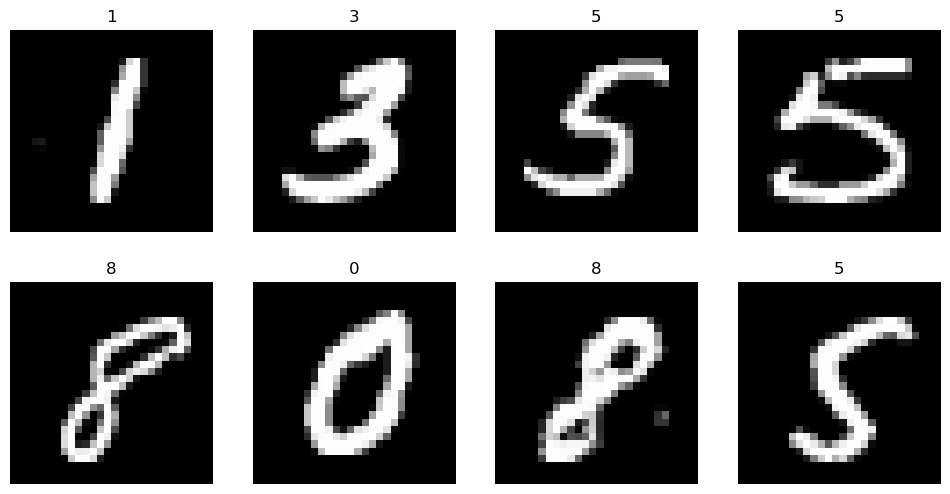

In [9]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

##### Neural Network 구성
 - layer : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
 - module : 한 개 이상의 계층이 모여서 구성
 - model : 한 개 이상의 모듈이 모여서 구성

**<span style = "color:pink">torch.nn</span>**

In [10]:
import torch.nn as nn

In [11]:
input = torch.randn(50000,20)
print(input)

tensor([[ 0.3593, -0.8073, -0.3817,  ...,  0.8017, -0.3109, -0.5868],
        [-0.9270,  0.8241, -0.4832,  ...,  0.3360,  0.7900, -0.4295],
        [-0.5157,  1.1787, -1.7832,  ..., -0.8992, -1.1858, -1.2621],
        ...,
        [-0.8947,  2.1954,  0.1276,  ..., -0.6367,  0.4996,  0.6196],
        [-0.5410,  0.6379, -0.8818,  ..., -1.1873,  0.8618, -0.8324],
        [-1.8855,  0.1118,  0.7275,  ..., -0.1676, -1.1339, -1.0167]])


In [12]:
m = nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.2600, -0.2910,  0.6639,  ...,  0.1203, -0.1921,  0.4341],
        [ 0.1588,  0.2367, -0.5012,  ..., -0.0647,  0.5716,  0.2016],
        [ 0.3733,  0.5920,  0.5140,  ..., -0.4593,  0.4445, -0.7122],
        ...,
        [ 0.0335,  0.8967, -0.5316,  ...,  0.3204, -0.6592, -0.5390],
        [ 0.4403,  0.8754, -1.0830,  ...,  1.8712,  0.2362, -1.4874],
        [-0.4371,  0.4636,  0.0875,  ...,  0.2579,  0.1467,  0.2255]],
       grad_fn=<AddmmBackward0>)
torch.Size([50000, 30])


In [13]:
## nn.Conv2d Layers

input = torch.randn(20, 16, 50, 100)

m = nn.Conv2d(16,33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [14]:
output= m(input)
print(output)
print(output.size())

tensor([[[[ 1.6513e-01,  3.8955e-02,  5.9944e-01,  ..., -1.9573e-01,
           -1.1714e-02, -2.5454e-01],
          [-6.8054e-01,  4.5450e-03, -1.2131e-01,  ..., -4.8449e-01,
           -2.9748e-01,  7.2668e-01],
          [-4.1515e-01, -2.4645e-01, -3.6262e-01,  ...,  6.3243e-01,
            5.4824e-01,  3.3075e-01],
          ...,
          [ 7.3260e-01, -8.7404e-01,  1.0379e+00,  ...,  1.2996e+00,
           -3.1052e-01,  8.8912e-01],
          [-1.9947e-01, -1.5622e-01, -1.6611e-01,  ..., -8.5170e-01,
           -3.4054e-01, -2.3964e-01],
          [ 1.6349e-01, -2.8833e-01,  4.8485e-01,  ...,  2.5088e-02,
           -1.1735e-01,  4.2973e-01]],

         [[-3.0051e-01, -4.1653e-02, -2.4867e-01,  ..., -6.5464e-01,
           -6.7561e-01,  1.3671e-01],
          [ 2.2811e-01, -5.4830e-03, -8.5000e-01,  ...,  2.2500e-01,
            4.5053e-01, -6.1327e-01],
          [-3.2862e-01, -1.6146e-01, -8.3838e-01,  ...,  8.6583e-01,
            4.5150e-01,  3.9855e-01],
          ...,
     

In [15]:
print(input)

tensor([[[[ 5.6932e-02, -3.9336e-02,  9.8141e-01,  ..., -6.9814e-01,
            1.1628e+00, -1.2096e+00],
          [-5.0831e-01, -7.2495e-01, -2.4289e+00,  ..., -1.0508e+00,
            7.0056e-01,  9.7317e-02],
          [ 3.8279e-01, -2.1515e+00, -1.4744e+00,  ..., -9.3848e-01,
            6.9801e-01,  5.2759e-01],
          ...,
          [ 1.5160e+00,  9.0683e-01,  9.1814e-01,  ...,  5.2352e-01,
            6.9742e-01, -4.6248e-01],
          [ 3.2358e-01,  2.6824e-01, -1.3461e+00,  ...,  1.5049e-01,
           -2.3971e-01,  7.2263e-01],
          [-4.2021e-02, -5.6506e-01,  6.0839e-01,  ...,  1.2685e+00,
           -6.4253e-01,  2.8155e-01]],

         [[-1.1270e-01,  7.9215e-01,  1.4315e-01,  ..., -1.2085e+00,
           -7.0583e-01, -7.7507e-02],
          [ 1.1207e+00,  2.0893e+00,  3.6260e-01,  ..., -1.5838e+00,
           -1.4142e+00,  3.4714e-01],
          [ 8.3984e-01,  3.9595e-01, -1.4997e+00,  ..., -9.6390e-02,
            3.0256e-01,  1.4608e+00],
          ...,
     

#### Convolutional Layers
    - in_channels : channel의 갯수
    - out_channels : 출력 채널의 갯수
    - kernel_size = 커널(필터) 사이즈

In [16]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [17]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cuda'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [18]:
# weight 확인
weight = layer.weight
print(weight)
print(weight.shape)

Parameter containing:
tensor([[[[-0.1443,  0.0482,  0.1103, -0.0685,  0.1564],
          [-0.1320,  0.0922, -0.1640, -0.0292,  0.1502],
          [-0.1564,  0.0686,  0.1502,  0.0207,  0.1664],
          [ 0.0085,  0.1240, -0.0196,  0.0491, -0.0616],
          [-0.1576, -0.1455,  0.1527,  0.1800,  0.0589]]],


        [[[-0.0193, -0.0576, -0.0868, -0.1407,  0.1819],
          [-0.1314,  0.1817,  0.0343,  0.0849,  0.1539],
          [-0.1213,  0.0241,  0.1577, -0.0999,  0.0271],
          [ 0.1925, -0.1904, -0.0954,  0.0003,  0.1029],
          [ 0.0426, -0.1241, -0.1647,  0.0022,  0.1474]]],


        [[[-0.0815, -0.1903,  0.1967,  0.0501,  0.0034],
          [-0.0264,  0.0080,  0.1812,  0.1701, -0.0533],
          [-0.1548, -0.1845, -0.1658,  0.1450, -0.0840],
          [-0.0901, -0.1207,  0.1639,  0.1213, -0.0500],
          [ 0.1074, -0.1563, -0.0439, -0.1903,  0.1232]]],


        [[[-0.1451,  0.1535, -0.0957,  0.0008, -0.0353],
          [ 0.0527, -0.0237,  0.1756, -0.0770, -0.1728

In [19]:
# weigth는 detach()를 통해 꺼내줘야 numpy() 변환이 가능함

weight = weight.detach()
print(weight)
print(weight.shape)

tensor([[[[-0.1443,  0.0482,  0.1103, -0.0685,  0.1564],
          [-0.1320,  0.0922, -0.1640, -0.0292,  0.1502],
          [-0.1564,  0.0686,  0.1502,  0.0207,  0.1664],
          [ 0.0085,  0.1240, -0.0196,  0.0491, -0.0616],
          [-0.1576, -0.1455,  0.1527,  0.1800,  0.0589]]],


        [[[-0.0193, -0.0576, -0.0868, -0.1407,  0.1819],
          [-0.1314,  0.1817,  0.0343,  0.0849,  0.1539],
          [-0.1213,  0.0241,  0.1577, -0.0999,  0.0271],
          [ 0.1925, -0.1904, -0.0954,  0.0003,  0.1029],
          [ 0.0426, -0.1241, -0.1647,  0.0022,  0.1474]]],


        [[[-0.0815, -0.1903,  0.1967,  0.0501,  0.0034],
          [-0.0264,  0.0080,  0.1812,  0.1701, -0.0533],
          [-0.1548, -0.1845, -0.1658,  0.1450, -0.0840],
          [-0.0901, -0.1207,  0.1639,  0.1213, -0.0500],
          [ 0.1074, -0.1563, -0.0439, -0.1903,  0.1232]]],


        [[[-0.1451,  0.1535, -0.0957,  0.0008, -0.0353],
          [ 0.0527, -0.0237,  0.1756, -0.0770, -0.1728],
          [-0.1843,

In [20]:
weight = weight.cpu().numpy()
weight.shape

(20, 1, 5, 5)

In [21]:
weight[19,0,:,:]

array([[-0.10878032,  0.04988471, -0.04664984,  0.17279984,  0.15332203],
       [ 0.09442021,  0.18301012, -0.06783442, -0.14768979, -0.19253929],
       [ 0.17299159,  0.17213134, -0.1198756 ,  0.03866239, -0.03366597],
       [-0.08394468,  0.01823242,  0.1270666 ,  0.14662252,  0.05383615],
       [-0.00235358,  0.14649548,  0.0422972 ,  0.11922391, -0.08030381]],
      dtype=float32)

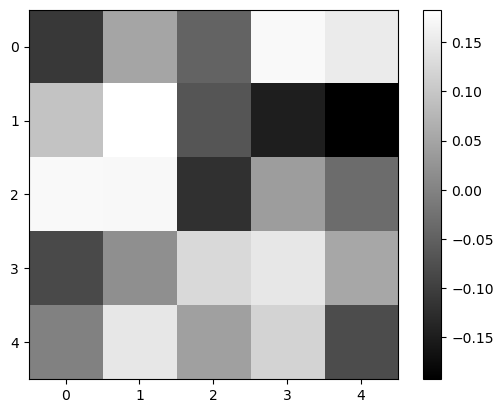

In [22]:
plt.imshow(weight[19,0,:,:], 'gray')
plt.colorbar()
plt.show()

In [23]:
print(images.shape)
print(images[0].size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])


In [24]:
input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([28, 28])


In [29]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

layer = layer.cpu()
input_data = input_data.cpu()
output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

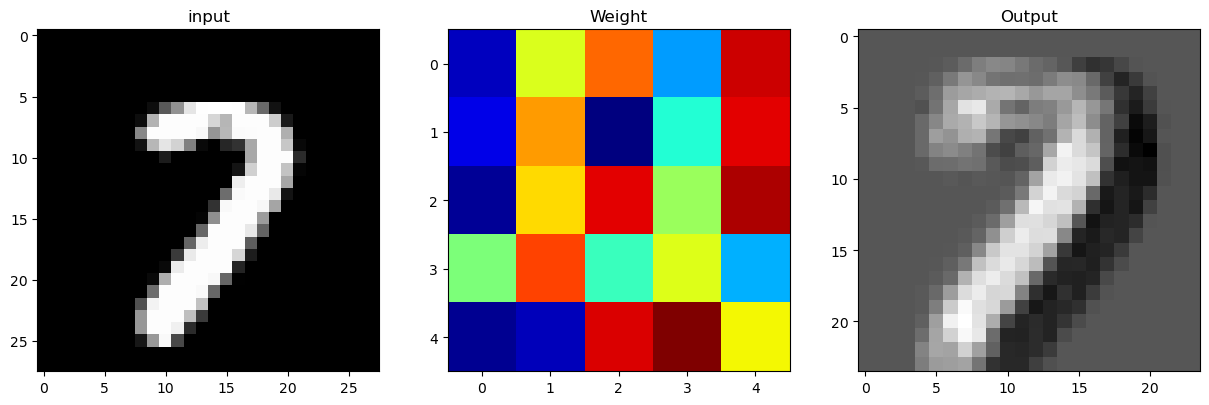

In [30]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

##### Pooling Layer

- F.max_pool2d
    - stride
    - kernel_size
- **<span style="color:pink"> torch.nn.MaxPool2d </span>** 도 많이 사용

In [31]:
import torch.nn.functional as F

In [32]:
pool = F.max_pool2d(output, 2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [33]:
# MaxPool Layer는 weight가 없기 때문에 바로 numpy()로 변환이 가능함
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

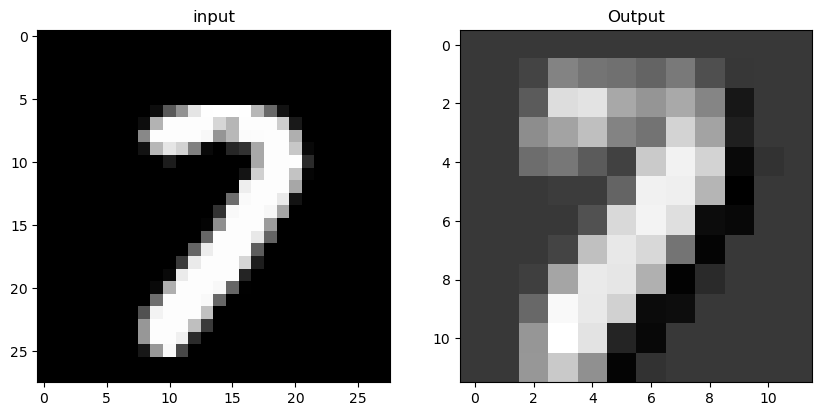

In [36]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title('input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

plt.show()

#### Linear Layer

- 1d 만 가능하므로 .view()를 통해 1d로 펼쳐줘야함

In [37]:
flatten = input_image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [38]:
lin = nn.Linear(784, 19)(flatten)
lin.shape

torch.Size([1, 19])

In [39]:
lin

tensor([[ 0.1411,  0.2715, -0.1014,  0.0834,  0.0324, -0.4931, -0.0366, -0.1677,
         -0.1638,  0.1630, -0.3276, -0.3832,  0.2046, -0.1656,  0.5396, -0.2370,
         -0.0904,  0.4671,  0.2302]], grad_fn=<AddmmBackward0>)

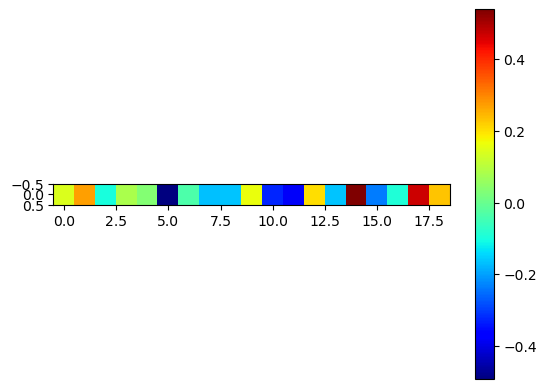

In [40]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

#### Non-Linear Activations

- F.softmax 와 같은 활성화 함수 등

In [41]:
with torch.no_grad():
    flatten = input_image.view(1,28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.0947, 0.1375, 0.1374, 0.1586, 0.0732, 0.0892, 0.1047, 0.0550, 0.0846,
         0.0649]])

In [42]:
np.sum(softmax.numpy())

1.0

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [48]:
# ReLU

inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [49]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### Define Model

- nn.Module 상속 클래스 정의
    - **<span style="color:pink">nn.Module을 상속</span>** 받는 클래스 정의
    - **<span style="color:pink">__init__()</span>** : 모델에서 사용될 모듈과 활성화 함수 등을 정의
    - **<span style="color:pink">forward()</span>** : 모델에서 실행되어야 하는 연산 정의

In [53]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [55]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### nn.Sequential을 이용한 신경망 정의
- nn.Sequential 객체로 그 안에 각 모듈을 순차적으로 실행
- __init__() 에서 사용할 네트워크 모델들을 nn.Sequential로 정의 가능
- forward()에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [56]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )

        def forward(self, x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0],-1)
            x = self.layer3(x)
            return x

In [57]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

## Pytorch Finetunning Models

## Loss Function

- 예측 값과 실제 값 사이의 오차 측정
- 학습이 진행되며서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
- 손실 함수에 따른 결과를 통해 학습 파라미터 조정
- 최적화 이론에서 최소화 하고자 하는 함수
- 미분 가능한 함수 사용
- 파이토치 주요 손실 함수
    - **<span style="color:pink">torch.nn.BCELoss</span>** : 이진분류
    - **<span style="color:pink">torch.nn.CrossEntropyLoss</span>** : 다중 클래스 분류
    - **<span style="color:pink">torch.nn.MSELoss</span>** : 회귀 모델에서 사용

## Optimizer

- 손실 함수를 기반으로 모델이 어떻게 업데이트 되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
- optimizer는 step()을 통해 전달받은 파라미터를 모델에 업데이트
- 모든 옵티마이저의 기본으로 torch.optim.Optimizer(params, defaults) 클래스 사용
- zero_grad() 를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
- torch.optim.lr_scheduler를 이용해 epochs에 따라 learning rate 조절
- Pytorch 주요 Optimizer : **<span style ="color:pink"> optim.Adadelta, optim.Adagrade, optim.Adam, optim.RMSprop, optim.SGD </span>**

## Learning rate scheduler

- 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
- 일정 횟수 이상이 되면 학습률을 감소(decay) 시키거나 전역 최소점 (global minimun) 근처에 가면 학습률을 줄이는 등
- Pytorch의 Learning Rate Scheduler 종류
    - optim.lr_scheduler.LambdaLR : 람다 함수를 이용해 그 결과를 학습률로 설정
    - optim.lr_scheduler.StepLR : 단계 마다 학습률을 감마 비율만큼 감소
    - optim.lr_scheduler.MultiStepLR : StepLR 과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
    - optim.lr_scheduler.ExponentialLR : Epochs 마다 이전 학습률의 감마만큼 곱함
    - optim.lr_scheduler.CosineAnnealingLR : 학습률을 코사인 함수의 형태처럼 변화시켜 학습률이 커지기도 하고 작아지고도 함.
    - optim.lr_scheduler.ReduceLROnPlateau : 학습이 잘되는지 안되는지에 따라 동적으로 학습률 변화

In [1]:
%pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [66]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10, ))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
print(acc)

tensor([[0.1546, 0.2749, 0.2576, 0.2499, 0.0630],
        [0.1279, 0.1891, 0.0407, 0.0752, 0.5672],
        [0.1017, 0.1205, 0.2067, 0.3268, 0.2443],
        [0.3643, 0.1274, 0.2049, 0.2799, 0.0235],
        [0.3359, 0.0495, 0.3531, 0.1312, 0.1303],
        [0.0573, 0.2994, 0.4262, 0.1283, 0.0888],
        [0.0812, 0.4369, 0.3180, 0.0229, 0.1410],
        [0.1520, 0.2997, 0.4661, 0.0387, 0.0434],
        [0.0298, 0.1006, 0.2907, 0.1959, 0.3830],
        [0.1925, 0.1621, 0.5564, 0.0358, 0.0532]]) tensor([4, 0, 3, 3, 4, 1, 1, 0, 1, 2])
tensor(0.3000)


In [74]:
#metric = torchmetrics.functional.accuracy()

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10, ))
    acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
    print(acc)

accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=5)

accuracy.update(preds, target)
acc = accuracy.compute()
print(acc)
    

tensor(0.4000)
tensor(0.2000)
tensor(0.1000)
tensor(0.3000)
tensor(0.1000)
tensor(0.1000)
tensor(0.2000)
tensor(0.2000)
tensor(0.1000)
tensor(0.2000)
tensor(0.2000)


## Linear Regression Model

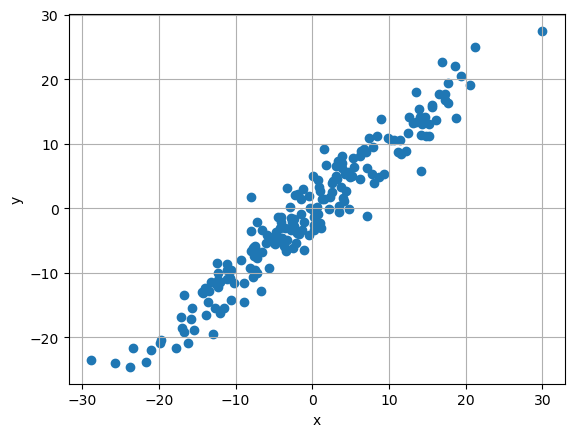

In [81]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## Define Model & HyperParameter

In [77]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [78]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.2079]], requires_grad=True), Parameter containing:
tensor([0.6557], requires_grad=True)]


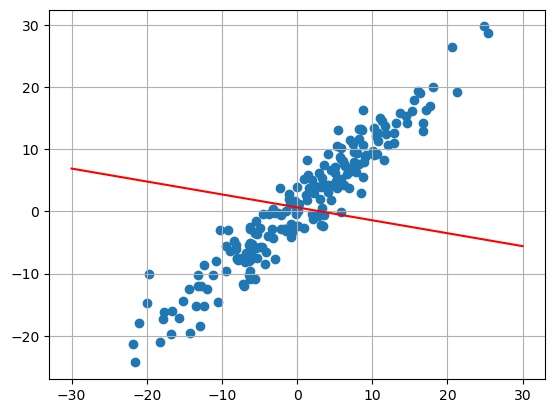

In [80]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

In [82]:
import torch.optim as optim

In [83]:
# Loss Function and Optimizer

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [84]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Model Training

In [85]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    loss.backward()

    optimizer.step()

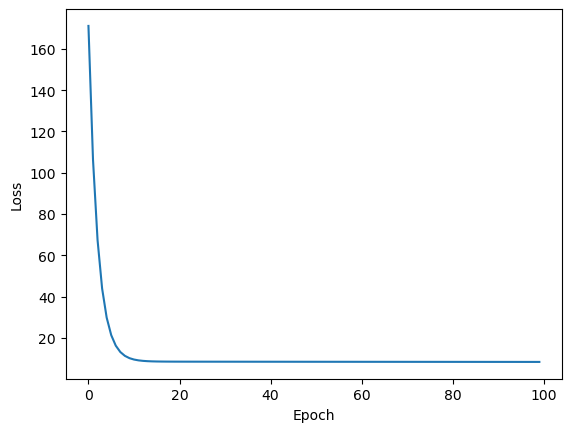

In [88]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

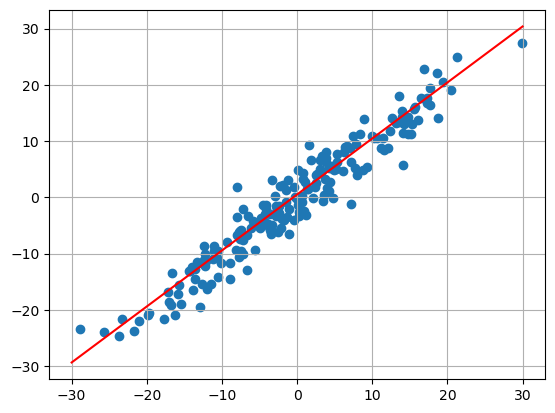

In [89]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()